In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

boende cd
beba eg
ferkessedougou ci
leshukonskoye ru
vallenar cl
soto la marina mx
umzimvubu za
valley city us
yatou cn
yellowknife ca
aguimes es
busselton au
saleaula ws
ushuaia ar
moose factory ca
mataura pf
mataura pf
gorontalo id
saint george bm
busselton au
faanui pf
ahipara nz
onalaska us
labis my
fort nelson ca
bandarbeyla so
manga br
port-gentil ga
goundi td
tasiilaq gl
tuktoyaktuk ca
padang id
san matias bo
kokhma ru
cape town za
geraldton au
ancud cl
wewak pg
sentyabrskiy ru
derzhavinsk kz
richards bay za
yellowknife ca
lakes entrance au
naze jp
mutsamudu km
havoysund no
albany au
biltine td
valparaiso cl
hobart au
saint-philippe re
rikitea pf
taolanaro mg
marrakesh ma
de-kastri ru
lata sb
palmer us
yellowknife ca
rumoi jp
bethel us
emerald au
belushya guba ru
ushuaia ar
cape town za
avarua ck
tuatapere nz
saleaula ws
hermanus za
marsa matruh eg
cape town za
petropavlovsk-kamchatskiy ru
rikitea pf
geraldton ca
ponta do sol cv
dikson ru
victoria sc
busselton au
saint-denis re


kapaa us
kodiak us
grand gaube mu
marsh harbour bs
bluff nz
kapaa us
okhotsk ru
tupik ru
castro cl
necochea ar
rikitea pf
mendi et
boyolangu id
saint george bm
bluff nz
ayorou ne
san vicente ph
marfino ru
east london za
piranshahr ir
pitimbu br
mataura pf
lata sb
sitka us
bratsk ru
san patricio mx
mataura pf
ribeira grande pt
ponta do sol cv
thompson ca
esperance au
rikitea pf
jamestown sh
tasiilaq gl
barentsburg sj
busselton au
kapaa us
taolanaro mg
bambous virieux mu
svetlogorsk ru
cherskiy ru
wahran dz
mys shmidta ru
punta arenas cl
galiwinku au
atuona pf
chuy uy
nelson bay au
camocim br
sur om
lorengau pg
punta arenas cl
chokurdakh ru
savannah bight hn
jawhar so
castro cl
kapaa us
ushuaia ar
albany au
port hedland au
taolanaro mg
taolanaro mg
kapaa us
ushuaia ar
bayan kw
hobart au
cape town za
tete mz
devonport au
upernavik gl
ushuaia ar
nguiu au
leningradskiy ru
koygorodok ru
sitka us
krasnoselkup ru
alofi nu
vaini to
meyungs pw
norman wells ca
murdochville ca
bunumbu sl
ushuaia a

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [9]:
import requests
requests.__version__

'2.27.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boende
Processing Record 2 of Set 1 | beba
Processing Record 3 of Set 1 | ferkessedougou
Processing Record 4 of Set 1 | leshukonskoye
Processing Record 5 of Set 1 | vallenar
Processing Record 6 of Set 1 | soto la marina
Processing Record 7 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 1 | valley city
Processing Record 9 of Set 1 | yatou
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | aguimes
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | moose factory
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | gorontalo
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | onalaska
Processing R

Processing Record 34 of Set 4 | winslow
Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | bubaque
Processing Record 37 of Set 4 | berkeley heights
Processing Record 38 of Set 4 | salalah
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | kangaatsiaq
Processing Record 42 of Set 4 | guangyuan
Processing Record 43 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 4 | tongliao
Processing Record 45 of Set 4 | marseille
Processing Record 46 of Set 4 | cruzeiro
Processing Record 47 of Set 4 | aklavik
Processing Record 48 of Set 4 | ocozocoautla
City not found. Skipping...
Processing Record 49 of Set 4 | leningradskiy
Processing Record 50 of Set 4 | tanete
Processing Record 1 of Set 5 | gao
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | vostok
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | warmbad
Processing Record 6 

Processing Record 22 of Set 8 | palmas
Processing Record 23 of Set 8 | egvekinot
Processing Record 24 of Set 8 | puerto palomas
Processing Record 25 of Set 8 | alta floresta
Processing Record 26 of Set 8 | lagoa
Processing Record 27 of Set 8 | tremedal
Processing Record 28 of Set 8 | vryburg
Processing Record 29 of Set 8 | asyut
Processing Record 30 of Set 8 | ambilobe
Processing Record 31 of Set 8 | mabaruma
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | tubruq
City not found. Skipping...
Processing Record 34 of Set 8 | irtyshskiy
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | okhotsk
Processing Record 37 of Set 8 | tupik
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 | mendi
Processing Record 40 of Set 8 | ayorou
Processing Record 41 of Set 8 | san vicente
Processing Record 42 of Set 8 | marfino
Processing Record 43 of Set 8 | piranshahr
Processing Record 44 of Set 8 | pitimbu
Processing Record 45 of

Processing Record 10 of Set 12 | luena
Processing Record 11 of Set 12 | roald
Processing Record 12 of Set 12 | jonkoping
Processing Record 13 of Set 12 | stornoway
Processing Record 14 of Set 12 | malyye derbety
Processing Record 15 of Set 12 | nanortalik
Processing Record 16 of Set 12 | parabel
Processing Record 17 of Set 12 | santa ana
Processing Record 18 of Set 12 | santa lucia
Processing Record 19 of Set 12 | obo
Processing Record 20 of Set 12 | dogondoutchi
Processing Record 21 of Set 12 | tsumeb
Processing Record 22 of Set 12 | moanda
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | voh
Processing Record 25 of Set 12 | san borja
Processing Record 26 of Set 12 | maltahohe
Processing Record 27 of Set 12 | eskisehir
Processing Record 28 of Set 12 | maragogi
Processing Record 29 of Set 12 | tiszabo
Processing Record 30 of Set 12 | viedma
Processing Record 31 of Set 12 | botngard
Processing Record 32 of Set 12 | luau
Processing Record 33 of Set 12 | 

In [14]:
len(city_data)

578

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boende,-0.2167,20.8667,75.70,47,99,2.48,CD,2022-02-03 00:25:37
1,Beba,22.4437,-79.7253,71.87,79,37,13.82,CU,2022-02-03 00:25:37
2,Ferkessedougou,9.6000,-5.2000,71.47,8,22,3.83,CI,2022-02-03 00:25:38
3,Leshukonskoye,64.8989,45.7622,7.83,98,96,2.19,RU,2022-02-03 00:25:39
4,Vallenar,-28.5708,-70.7581,71.15,53,0,4.07,CL,2022-02-03 00:25:39
5,Soto La Marina,23.7667,-98.2167,74.77,76,0,14.43,MX,2022-02-03 00:25:39
6,Valley City,46.9233,-98.0032,-6.61,70,20,9.22,US,2022-02-03 00:25:40
7,Yatou,37.1500,122.3833,28.26,55,3,3.00,CN,2022-02-03 00:25:40
8,Yellowknife,62.4560,-114.3525,-24.45,75,20,4.61,CA,2022-02-03 00:25:41
9,Aguimes,27.9054,-15.4461,70.66,60,20,16.11,ES,2022-02-03 00:25:41


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Boende,CD,2022-02-03 00:25:37,-0.2167,20.8667,75.70,47,99,2.48
1,Beba,CU,2022-02-03 00:25:37,22.4437,-79.7253,71.87,79,37,13.82
2,Ferkessedougou,CI,2022-02-03 00:25:38,9.6000,-5.2000,71.47,8,22,3.83
3,Leshukonskoye,RU,2022-02-03 00:25:39,64.8989,45.7622,7.83,98,96,2.19
4,Vallenar,CL,2022-02-03 00:25:39,-28.5708,-70.7581,71.15,53,0,4.07


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

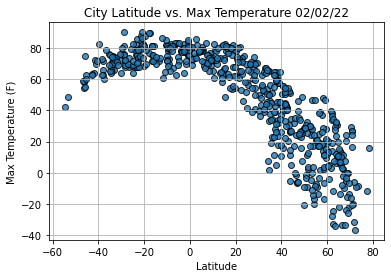

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

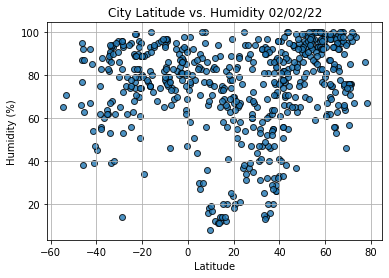

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

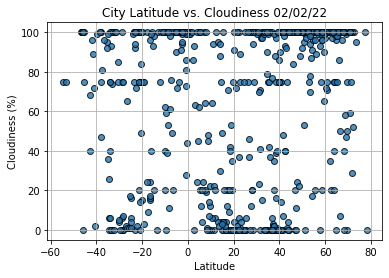

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

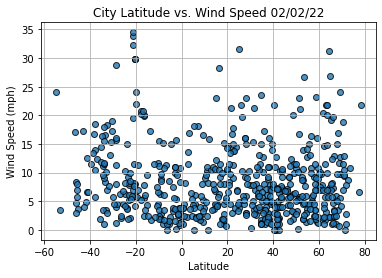

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

SyntaxError: invalid syntax (2317673131.py, line 3)